In [1]:
%load_ext autoreload
%autoreload 2

from model import EfficientDetModel
import torch
import pandas as pd
from data_utils import ShapeDatasetAdaptor, EfficientDetDataModule
from pathlib import Path
from plot_functions import compare_bboxes_for_image


/home/holden/miniconda3/envs/ptorch-lightning/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset_path = Path('../data-gen/output')
test_df = pd.read_csv(dataset_path/'testannotations.csv')
test_data_path = dataset_path/'test'
test_ds = ShapeDatasetAdaptor(test_data_path, test_df)
model = EfficientDetModel(
    num_classes=13,
    img_size=512,
    model_architecture="efficientnet_b0"
    )

model.load_state_dict(torch.load('efficientnet_b0_pytorch_50epoch_2.pt'))
model.eval()

print("loaded model")

loaded model


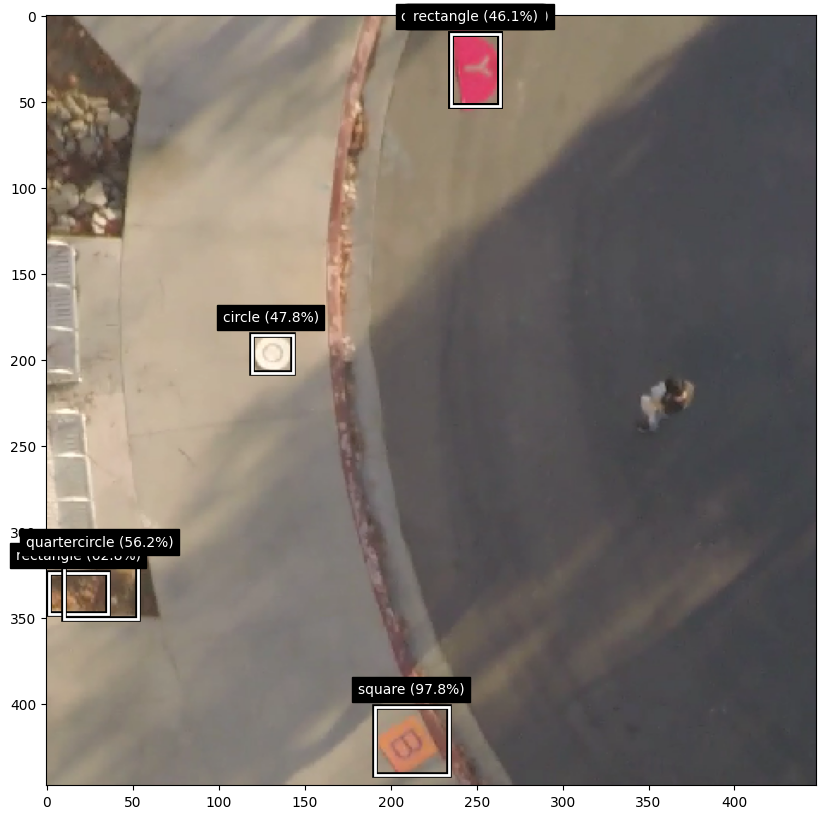

In [29]:
import os
from PIL import Image
from plot_functions import show_image
import json
labels_dict=None
with open("../data-gen/shape_name_labels.json", "r") as f:
    labels_dict = dict(reversed(t) for t in json.load(f))
def run_on_real_data(real_data_dir: str):
    images = []
    for file in os.listdir(real_data_dir):
        images.append(Image.open(f"{real_data_dir}/{file}"))
    predicted_bboxes, predicted_class_labels, predicted_class_confidences  = model.predict(images)
    for image, labels, confidences, bboxes in zip(images, predicted_class_labels, predicted_class_confidences, predicted_bboxes):
        show_image(image,bboxes,labels,confidences, labels_dict=labels_dict)
run_on_real_data("real_test_data")

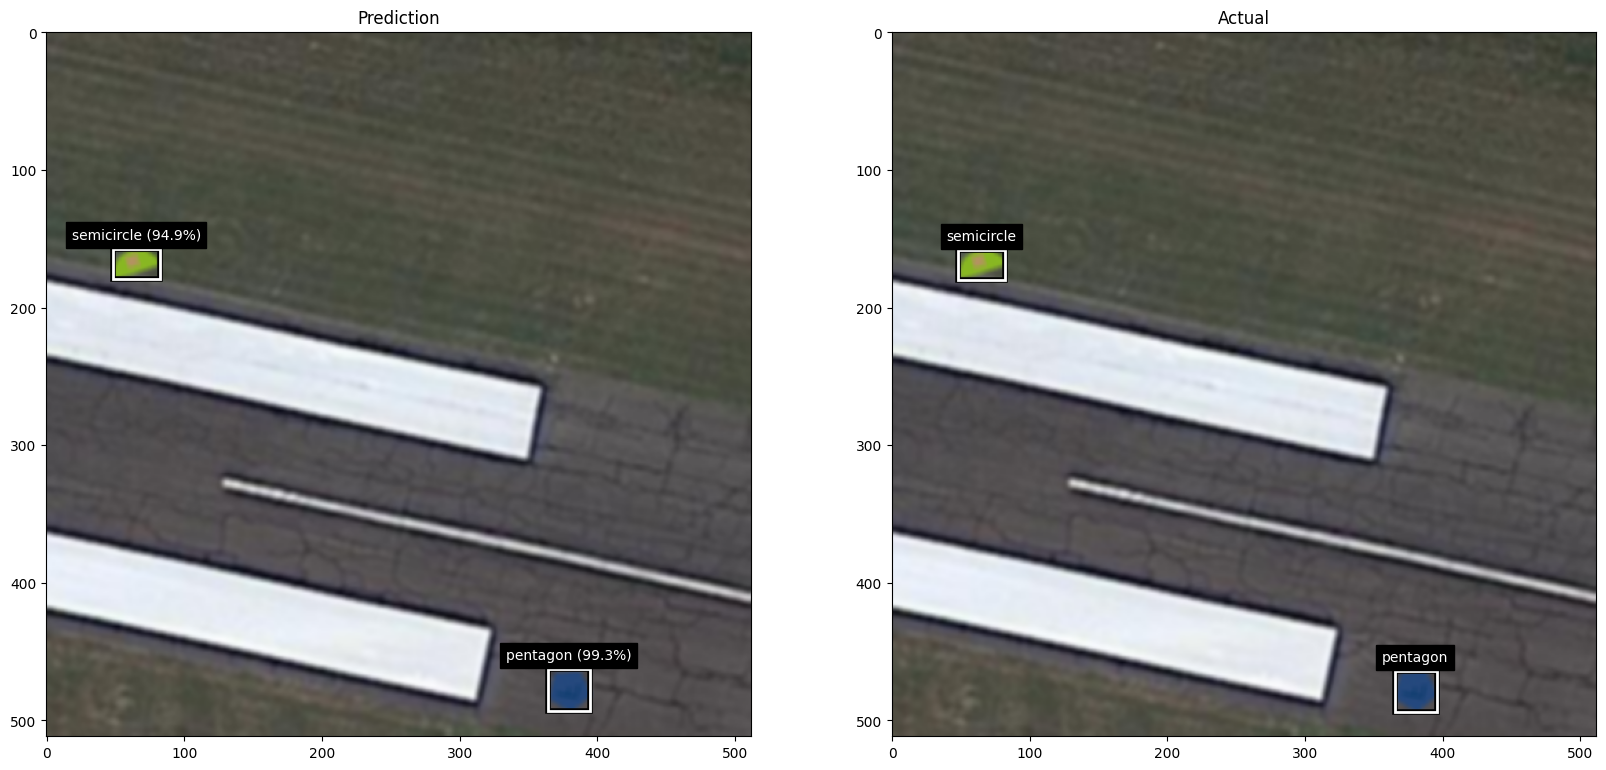

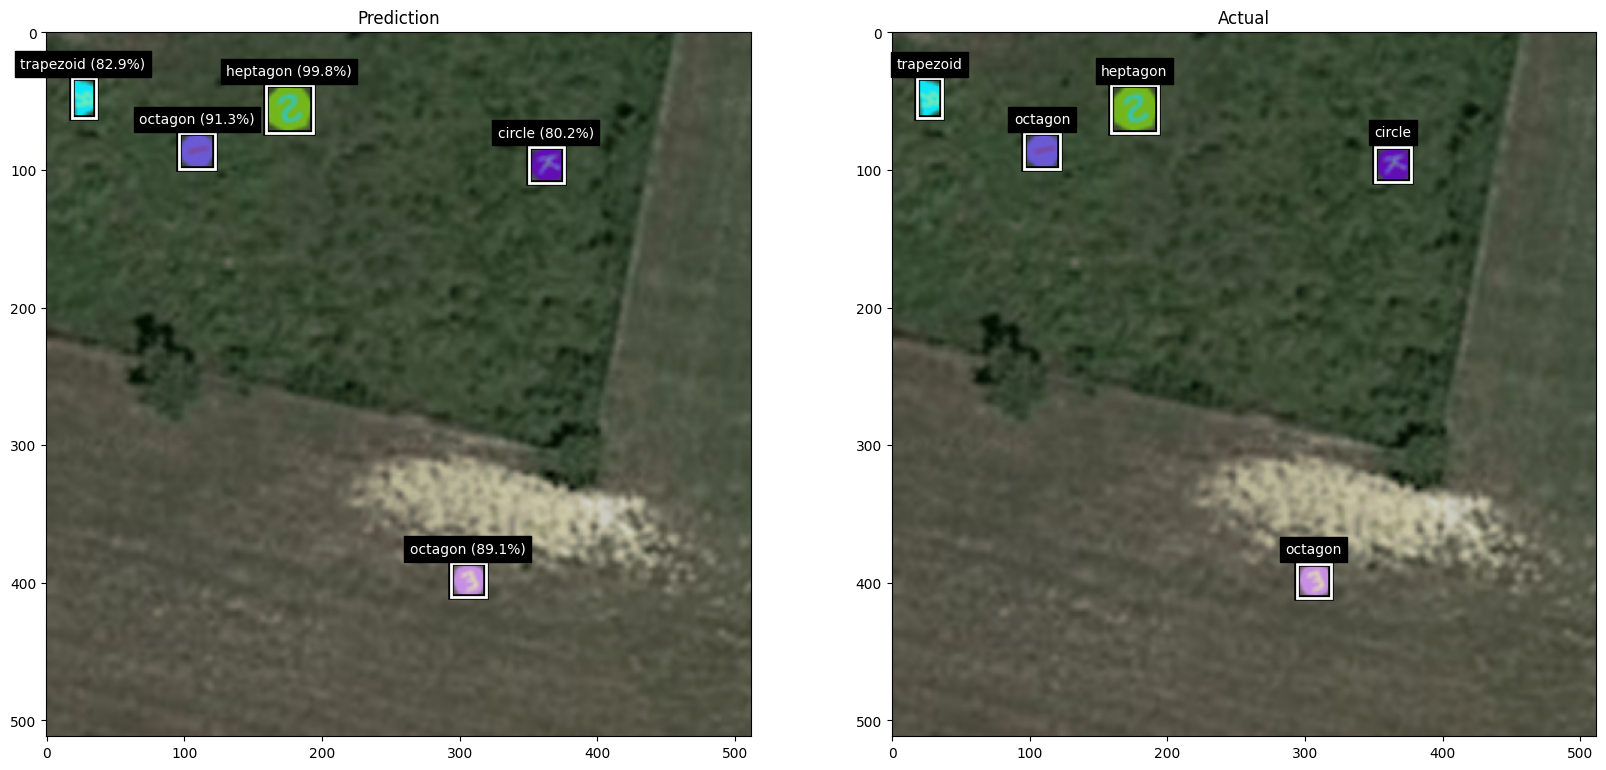

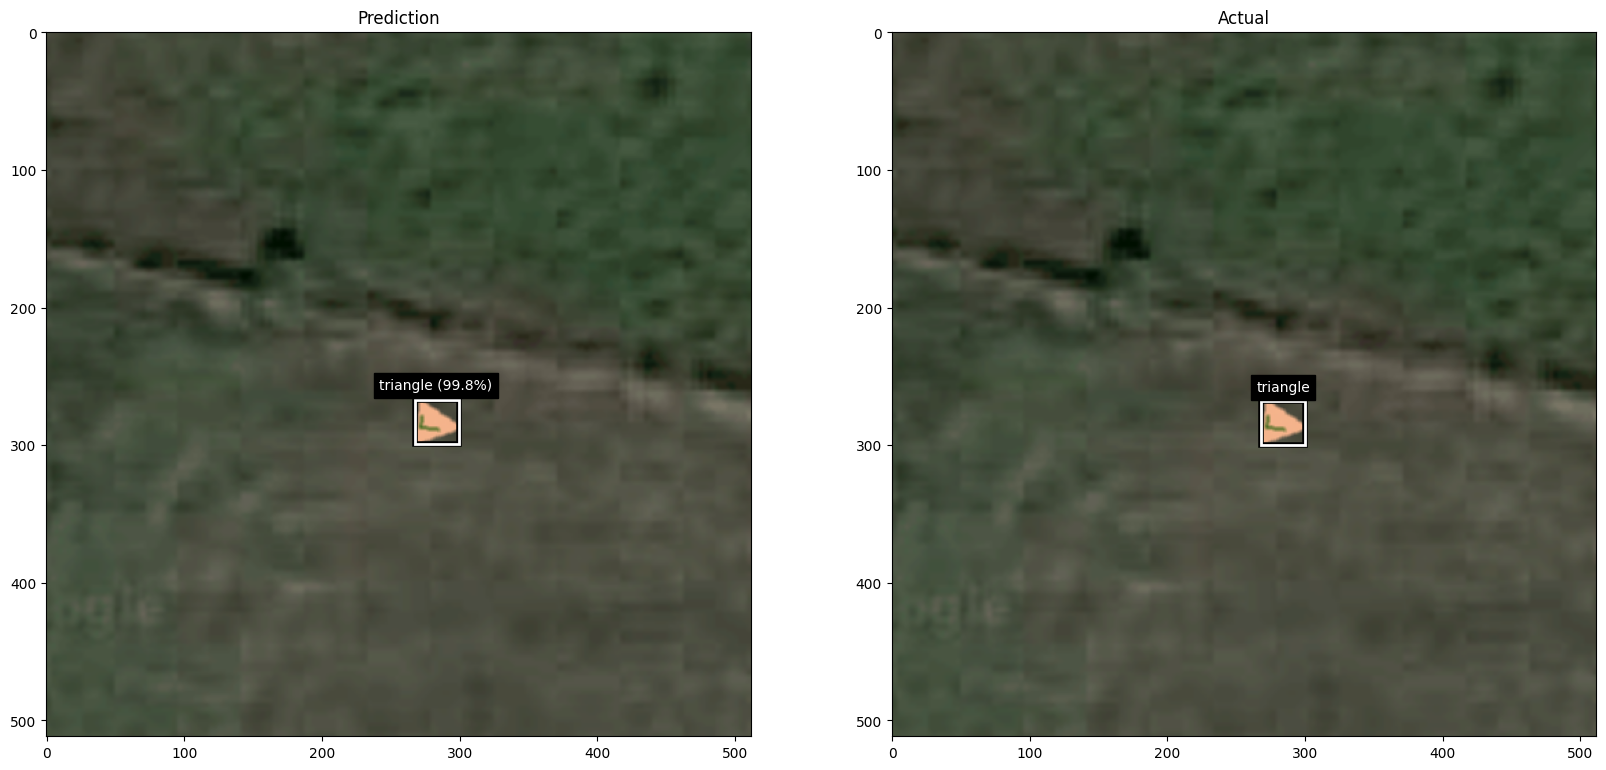

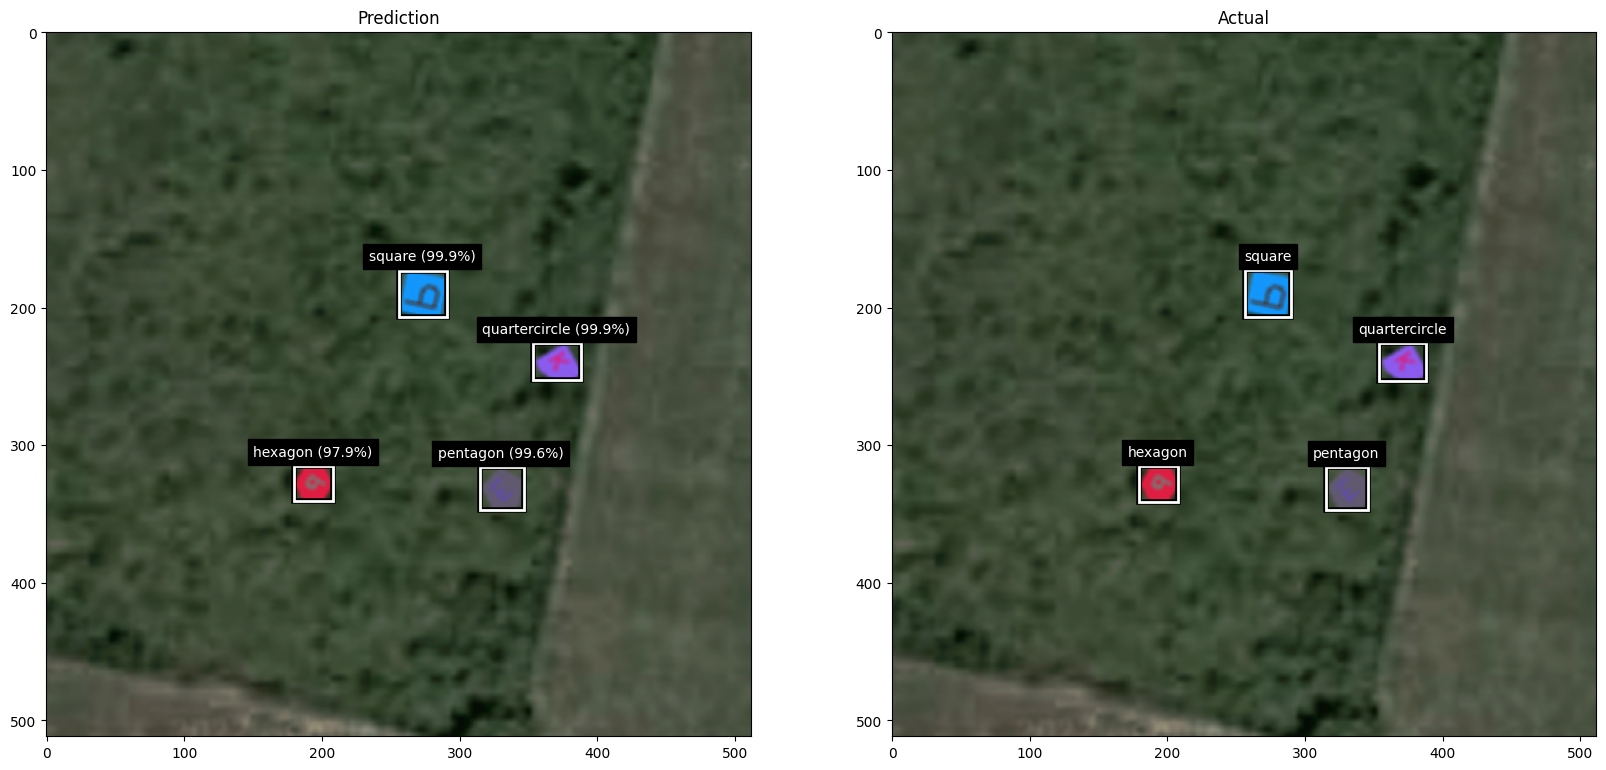

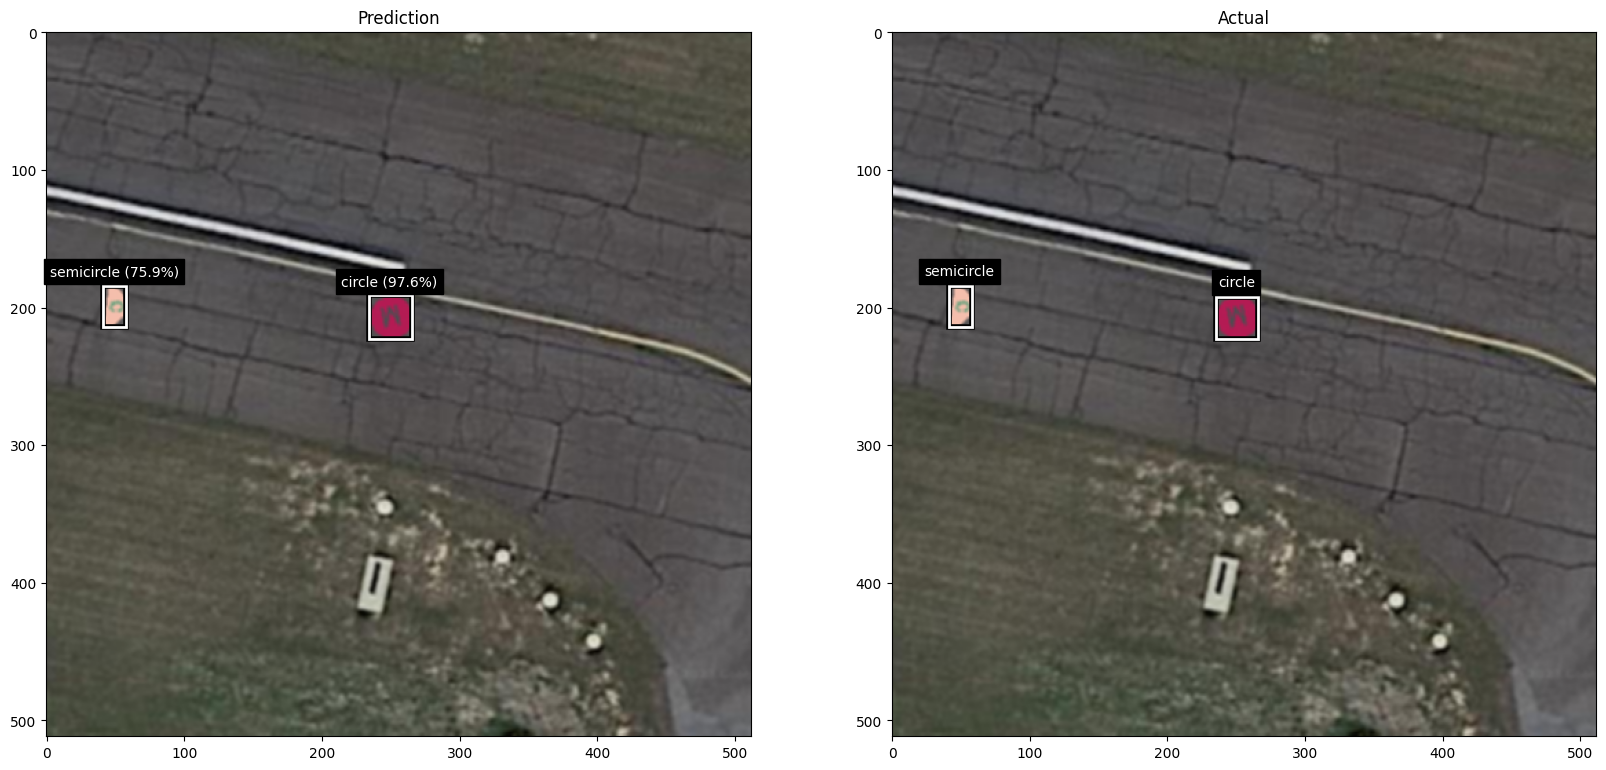

In [30]:

def run_on_test_set():
    num_samples = 5#len(cars_train_ds.images)
    img_labels_list = [test_ds.get_image_and_labels_by_idx(i) for i in range(num_samples)]
    # type of img_labels_list: [(PIL image, ndarray, pd.Series, int)]
    images = [x[0] for x in img_labels_list]
    actual_labels = [x[2].values for x in img_labels_list]
    # print(len(actual_labels), actual_labels[0])
    predicted_bboxes, predicted_class_labels, predicted_class_confidences  = model.predict(images)
    for i in range(num_samples):
        # print(i, predicted_class_confidences[i], predicted_class_labels[i])
        image = images[i]
        truth_bboxes = img_labels_list[i][1]
        compare_bboxes_for_image(image, predicted_bboxes=predicted_bboxes[i], actual_bboxes=truth_bboxes.tolist(), predicted_labels=predicted_class_labels[i], actual_labels=actual_labels[i],
        confidences=predicted_class_confidences[i],
        labels_dict=labels_dict)
run_on_test_set()